In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('C:\Data Scientist\Interview\kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


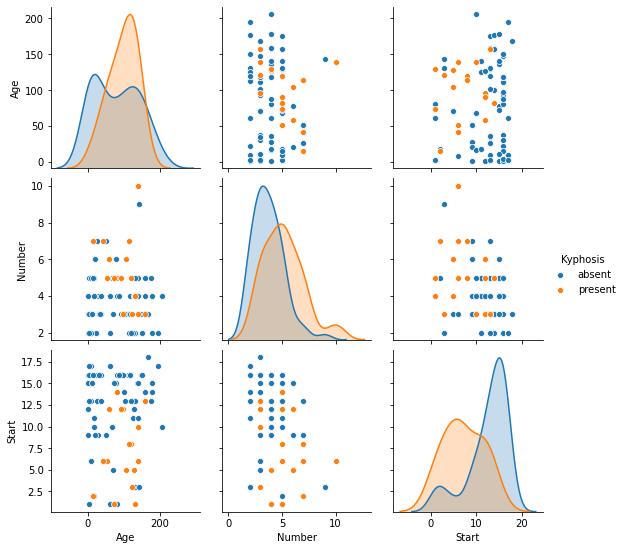

In [4]:
sns.pairplot(df,hue='Kyphosis')

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree=DecisionTreeClassifier(criterion='entropy')

In [10]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [11]:
predictions=dtree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [13]:
conf_matrix=confusion_matrix(y_test,predictions)
accuracy=accuracy_score(y_test,predictions)

In [14]:
conf_matrix,accuracy

(array([[19,  2],
        [ 1,  3]], dtype=int64),
 0.88)

In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.95      0.90      0.93        21
     present       0.60      0.75      0.67         4

    accuracy                           0.88        25
   macro avg       0.77      0.83      0.80        25
weighted avg       0.89      0.88      0.89        25



In [17]:
from IPython.display import Image
from sklearn.externals.six import StringIO

from sklearn.tree import export_graphviz
import pydot

features=list(df.columns[1:])
features

C:\Users\Vidya\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


['Age', 'Number', 'Start']

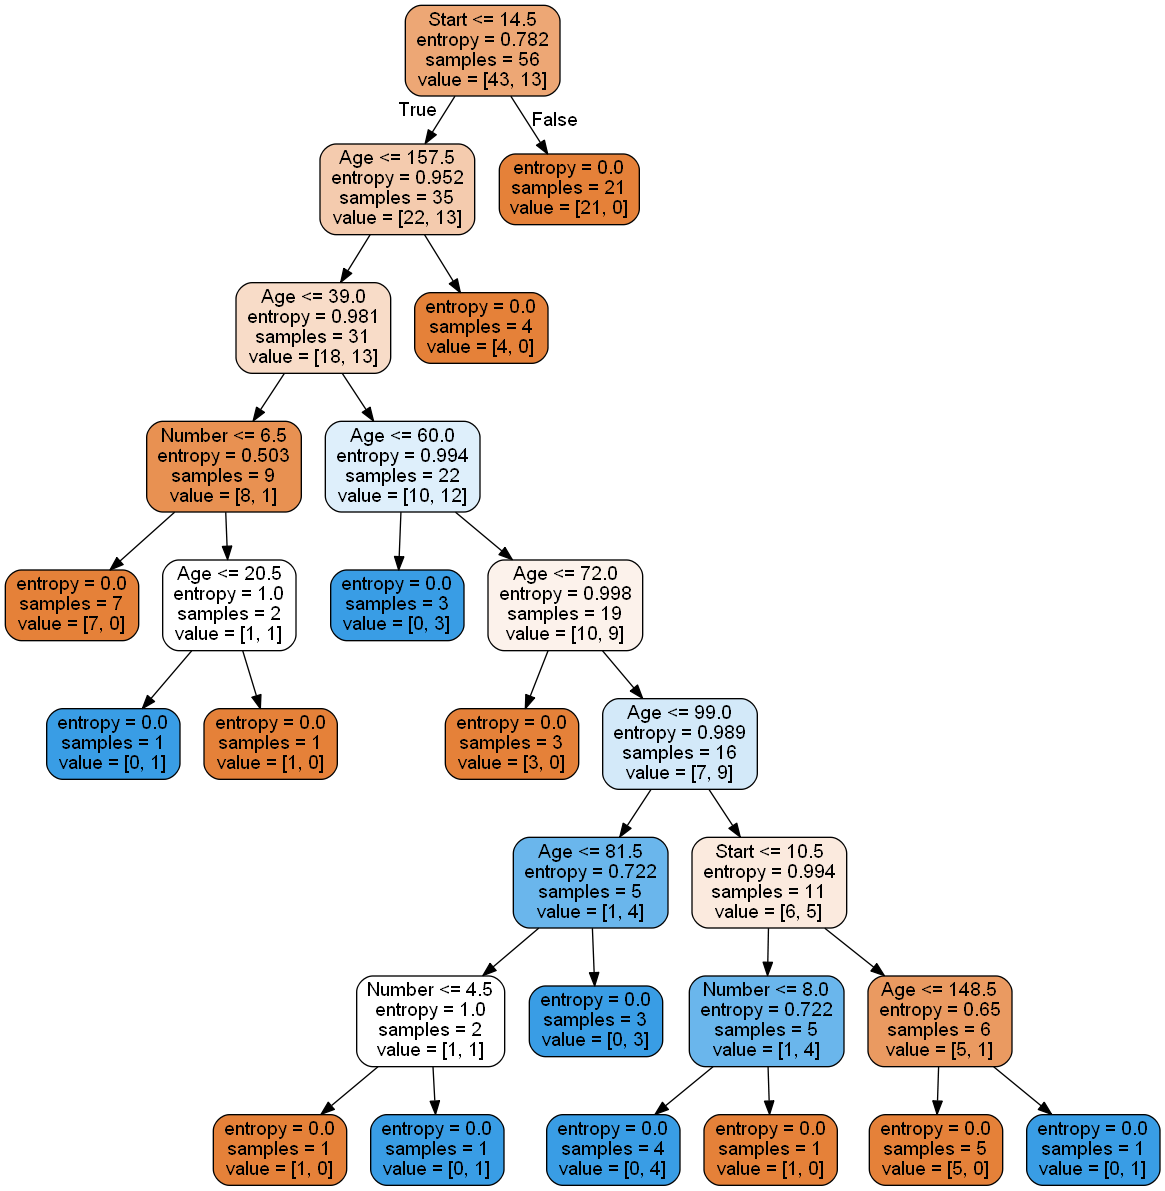

In [20]:
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())